In [1]:
%matplotlib inline

In [2]:
import numpy as np
from pynq import Overlay
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as plt3d
import random
from matplotlib import rc

ru = random.uniform

In [3]:
from IPython.display import HTML

In [4]:
overlay = Overlay('/home/xilinx/pynq/overlays/ParticleSimulator/particleSim.bit')
sim = overlay.ParticleSimulator

In [5]:
from pynq import Xlnk
xlnk = Xlnk()

In [6]:
l = 10

In [7]:
x = xlnk.cma_array(shape=(l,), dtype=np.float32)
y = xlnk.cma_array(shape=(l,), dtype=np.float32)
z = xlnk.cma_array(shape=(l,), dtype=np.float32)

vx = xlnk.cma_array(shape=(l,), dtype=np.float32)
vy = xlnk.cma_array(shape=(l,), dtype=np.float32)
vz = xlnk.cma_array(shape=(l,), dtype=np.float32)

ax = xlnk.cma_array(shape=(l,), dtype=np.float32)
ay = xlnk.cma_array(shape=(l,), dtype=np.float32)
az = xlnk.cma_array(shape=(l,), dtype=np.float32)

dt = xlnk.cma_array(shape=(1,), dtype=np.float32)
decayC = xlnk.cma_array(shape=(1,), dtype=np.float32)
gravity = xlnk.cma_array(shape=(1,), dtype=np.float32)

outx = xlnk.cma_array(shape=(l,), dtype=np.float32)
outy = xlnk.cma_array(shape=(l,), dtype=np.float32)
outz = xlnk.cma_array(shape=(l,), dtype=np.float32)

outvx = xlnk.cma_array(shape=(l,), dtype=np.float32)
outvy = xlnk.cma_array(shape=(l,), dtype=np.float32)
outvz = xlnk.cma_array(shape=(l,), dtype=np.float32)

In [8]:
graphLimits = 1000

decayC[0] = 1
gravity[0] = -0.01

for i in range(l):
    x[i] = ru(0,graphLimits)
    y[i] = ru(0,graphLimits)
    z[i] = ru(0,graphLimits)
    
    vx[i] = ru(-1,1)
    vy[i] = ru(-1,1)
    vz[i] = ru(-1,1)
    
    ax[i] = 0
    ay[i] = 0
    az[i] = 0


In [9]:
dt[0] = 0.01

Text(0.5,0,'Z Label')

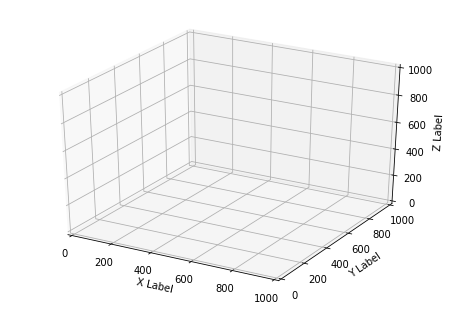

In [10]:
#set figure up
fig = plt.figure()
axe = plt3d.Axes3D(fig)
axe.set_xlim3d(0, graphLimits)
axe.set_ylim3d(0, graphLimits)
axe.set_zlim3d(0, graphLimits)
axe.set_xlabel('X Label')
axe.set_ylabel('Y Label')
axe.set_zlabel('Z Label')

In [11]:
def runOverlay():
    sim.write(0x58, dt.physical_address)
    sim.write(0x60, decayC.physical_address)
    sim.write(0x68, gravity.physical_address)
    sim.write(0x70, graphLimits)
    sim.write(0x78, l)

    sim.write(0x10, x.physical_address)
    sim.write(0x18, vx.physical_address)
    sim.write(0x20, ax.physical_address)
    sim.write(0x28, y.physical_address)
    sim.write(0x30, vy.physical_address)
    sim.write(0x38, ay.physical_address)
    sim.write(0x40, z.physical_address)
    sim.write(0x48, vz.physical_address)
    sim.write(0x50, az.physical_address)

    sim.write(0x80, outx.physical_address)
    sim.write(0x88, outy.physical_address)
    sim.write(0x90, outz.physical_address)
    
    sim.write(0x98, outvx.physical_address)
    sim.write(0xa8, outvy.physical_address)
    sim.write(0xa8, outvz.physical_address)
    
    sim.write(0x0,1)
    
    for i in range(l):
        x[i] = outx[i]
        y[i] = outy[i]
        z[i] = outz[i]
        
        vx[i] = outvx[i]
        vy[i] = outvy[i]
        vz[i] = outvy[i]
    

In [12]:
#Animation Function
def update(dt):
    runOverlay()
    
    axe.clear()  
    axe.scatter(x,y,z, s = 5)
    axe.set_xlim3d(0, graphLimits)
    axe.set_ylim3d(0, graphLimits)
    axe.set_zlim3d(0, graphLimits)
    axe.set_xlabel('X Label')
    axe.set_ylabel('Y Label')
    axe.set_zlabel('Z Label')

In [30]:
x

PynqBuffer([ 895.31079102,  547.13641357,  364.5269165 ,  624.99621582,
             295.99664307,  476.64996338,   47.46316528,  925.6428833 ,
             584.38708496,  268.48208618], dtype=float32)

In [31]:
runOverlay()

In [32]:
x

PynqBuffer([ 895.31072998,  547.13647461,  364.52700806,  624.99621582,
             295.9967041 ,  476.65002441,   47.46307373,  925.64294434,
             584.38702393,  268.48202515], dtype=float32)

In [33]:
runOverlay()

In [34]:
x

PynqBuffer([ 895.31072998,  547.13653564,  364.52709961,  624.99621582,
             295.99676514,  476.65008545,   47.46298218,  925.64300537,
             584.38696289,  268.48196411], dtype=float32)

In [35]:
runOverlay()

In [36]:
x

PynqBuffer([ 895.31066895,  547.13659668,  364.52719116,  624.99621582,
             295.99682617,  476.65014648,   47.46289062,  925.64306641,
             584.38690186,  268.48190308], dtype=float32)

In [37]:
runOverlay()

In [38]:
x

PynqBuffer([ 895.31060791,  547.13665771,  364.52728271,  624.99621582,
             295.99688721,  476.65020752,   47.46279907,  925.64312744,
             584.38684082,  268.48184204], dtype=float32)

In [14]:
#animate
anim = animation.FuncAnimation(fig, update, interval = dt[0]*1000)

In [15]:
anim._repr_html_() is None

True

In [16]:
anim

In [17]:
rc('animation', html='jshtml')

In [18]:
anim

KeyboardInterrupt: 